# Algorithms: spectral embedding

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import networkx as nx

### for computing partial eigenvectors
import scipy.linalg as LA

## Spectral embedding
Let $G$ be a graph  
and $L$ its Laplacian matrix.  

The **spectral embedding** uses  
the eigenvectors of $L$  
to generate positions for each vertex.

Therefore, the spectral embedding  
is also called the **Laplacian embedding**.

![Spectral embedding of a path](spectral_embedding.png "Spectral embedding of a path")

### Algorithm
Let $G$ be a graph on $n$ vertices  
and $L$ its Laplacian matrix.  
Let $d$ be the target dimension.  

Suppose the eigenvalues of $L$ are  
$\{\lambda_0=0, \lambda_1, \ldots, \lambda_{n-1}\}$  
and the corresponding eigenvalues are  
$\{{\bf v}_0=\frac{1}{\sqrt{n}}{\bf 1}, {\bf v}_1, \ldots, {\bf v}_{n-1}\}$.  
(We may assume these eigenvectors are of length $1$,  
and they are mutually orthogonal.)

Create a matrix $Y = 
\begin{bmatrix} 
| & \cdots & | \\
{\bf v}_1 & \cdots & {\bf v}_d \\
| & \cdots & | \\
\end{bmatrix} = 
\begin{bmatrix}
- & {\bf y}_0 & - \\
\vdots & \vdots & \vdots \\
- & {\bf y}_{n -1} & - \\
\end{bmatrix}$.  
Then assign ${\bf y}_i$ to be  
the position for vertex $i$.  

### Properties of the spectral embedding
The $Y$ matrix has the properties below.
* $Y^\top Y=I$: column vectors are of unit length and  
  are mutually orthogonal.
* $\operatorname{tr}(Y^\top LY) = \sum_{ij\in E(G)}\|{\bf y}_i-{\bf y}_j\|_2^2$  
  is the square sum of the edge length.
* The chosen $Y$ minimize $\operatorname{tr}(Y^\top LY)$  
  subject to $Y^\top Y=I$.

**Conclusion**:  
The spectral embedding  
tends to put adjacent vertices together.

### Pseudocode
**Input**:  
a graph `g` and a target dimension `d`  
**Output**:
a dictionary {i: position of vertex i as an array}  
the position is given by the spectral embedding onto $\mathbb{R}^d$
```Python
L = the Laplacian matrix of g
compute the eigenvectors v1, ..., vd
Y = the array whose columns are v1, ..., vd
pos = {i: Y[i] for i in range(g.order())}
```

##### Exercise
Let `g = nx.path_graph(10)`.  
Use `nx.laplacian_matrix` to find  
the Laplacian matrix of `g`.

In [ ]:
### your answer here


##### Exercise
Let `g = nx.path_graph(10)`.    
The output of `nx.laplacian_matrix`  
is a sparse matrix.  
Use `<spare matrix>.toarray`  
to transform it to an array.

In [ ]:
### your answer here


##### Exercise
Let `L = 5*np.eye(5) - np.ones((5,5))`.  
Use `LA.eigh` to find  
the eigenvalues and the eigenvectors of `L`.

Note:  The module `LA` comes from 
```Python
import scipy.linalg as LA
```

In [ ]:
### your answer here


##### Exercise
Let `L = 5*np.eye(5) - np.ones((5,5))` and `d = 2`.  
The function `LA.eigh` has a keyword `eigvals`  
that allows you to compute  
certain eigenvalues and eigenvectors only.  
Use them to find `Y` whose columns are `v1, ..., vd`.  

In [ ]:
### your answer here


##### Exercise
Write a function `spectral_embedding(g, d)`  
that returns the dictionary  
`{i: position of vertex i of g in Rd}`.

In [ ]:
### your answer here


##### Exercise
Let `g = nx.path_graph(10)` and  
`pos = spectral_embedding(g, 2)`.  
Draw the graph by `nx.draw` using this posision.  

Compare the drawing with  
```Python
nx.draw(g, pos=nx.spectral_layout(g))
```

In [ ]:
### your answer here


##### Exercise
Run the code below.
```Python
g = nx.path_graph(10)
pos = spectral_embedding(g, 2)
Y = np.vstack(list(pos.values()))
x,y = Y.T
```
Use `plt.scatter` to plot the vertices  
with respect to the positions in `pos`.

In [ ]:
### your answer here


##### Exercise
Run the code below.
```Python
g = nx.path_graph(10)
pos = spectral_embedding(g, 2)
Y = np.vstack(list(pos.values()))
x,y = Y.T
```
Go through a `for` loop on `g.edges()`  
and use `plt.plot` plot each edge of `g`.

In [ ]:
### your answer here


##### Exercise
Given a NetworkX graph object `g`.  
Embed the graph onto $\mathbb{R}^2$  
and use matplotlib to draw the graph.

In [ ]:
### your answer here


##### Exercise
Given a NetworkX graph object `g`.  
Embed the graph onto $\mathbb{R}^3$  
and use matplotlib to draw the graph.

You will need the following settings.
```Python
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
```
After the settings,  
`ax.scatter(x, y, z)` and `ax.plot(x, y, z)`  
can be used to draw a 3D graph.

In [ ]:
### your answer here


##### Exercise  
The term **spectral clustering**  
is (more or less) the same as  
[data to graph](Algorithms-data-to-graph.ipynb) + 
[spectral embedding](Algorithms-spectral-embedding.ipynb) + 
[$k$-mean clustering](Algorithms-k-mean-clustering.ipynb).  

Create a function `spectral_clustering(X, e, d, k)`  
that returns `y` whose entries are in 0, ..., k-1  
and indicates the belonging groups.  
Here `e` is used for the epsilon ball algorithm as the threshold, while  
`d` is used for spectral embedding as the target dimension.

In [ ]:
### your answer here


##### Sample code for the spectral embedding onto $\mathbb{R}^2$ and $\mathbb{R}^3$

In [19]:
def Laplacian_2_embedding(g, draw=True):
    """
    Input:
        g: NetworkX graph object
        draw: draw the graph when draw == True
    Output:
        a dictionary {i: position of vertex i as an array}  
        the position is given by  
        the Laplacian embedding onto R^2

        This function works only when the graph is  
        labeled by {0, 1, ..., g.order() - 1}
    """
    n = g.order()
    L = nx.laplacian_matrix(g).toarray()
    lam, Y = LA.eigh(L, eigvals=(1,2))
    x,y = Y.T
    
    ### create pos
    pos = {i: Y[i] for i in range(n)}
    
    if draw:
        fig = plt.figure()
        ax = plt.axes()
        ### plot points
        ax.scatter(x, y, s=50, zorder=3)
        ### add vertex labels
        for i in range(n):
            ax.annotate(i, (x[i], y[i]), zorder=4)
        ### add lines
        for i,j in g.edges():
            ax.plot([x[i],x[j]], [y[i],y[j]], 'c')
            
    return pos

In [39]:
def Laplacian_3_embedding(g, draw=True):
    """
    Same function as Laplacian_2_embedding  
    except the graph is embedded  
    to R^3
    """
    n = g.order()
    L = nx.laplacian_matrix(g).toarray()
    lam, Y = LA.eigh(L, eigvals=(1,3))
    x,y,z = Y.T
    
    ### create pos
    pos = {i: Y[i] for i in range(n)}
    
    if draw:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ### plot points
        ax.scatter(x, y, z, s=50, zorder=3)
        ### add vertex labels
        for i in range(n):
            ax.text(x[i], y[i], z[i], i, zorder=4)
        ### add lines
        for i,j in g.edges():
            ax.plot([x[i],x[j]], [y[i],y[j]], [z[i],z[j]], 'c')
#         fig.savefig('spectral_embedding.png')
            
    return pos

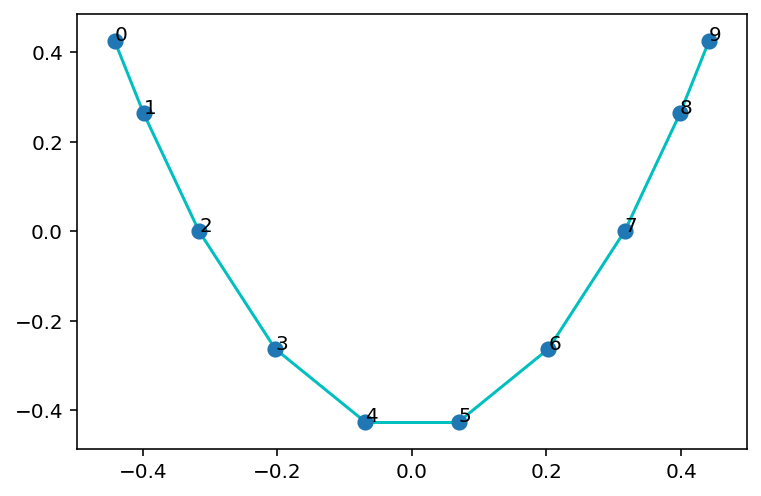

In [20]:
g = nx.path_graph(10)
pos = Laplacian_2_embedding(g)

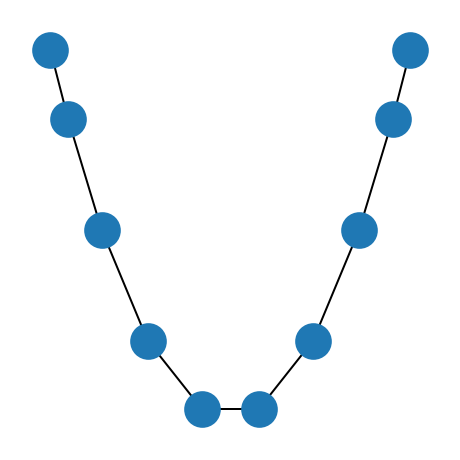

In [37]:
fig = plt.figure(figsize=(3,3))
nx.draw(g, pos=pos)

{0: array([-0.44170765,  0.4253254 , -0.39847023]),
 1: array([-0.39847023,  0.26286556, -0.06995962]),
 2: array([-3.16227766e-01, -6.38681904e-18,  3.16227766e-01]),
 3: array([-0.20303072, -0.26286556,  0.44170765]),
 4: array([-0.06995962, -0.4253254 ,  0.20303072]),
 5: array([ 0.06995962, -0.4253254 , -0.20303072]),
 6: array([ 0.20303072, -0.26286556, -0.44170765]),
 7: array([ 3.16227766e-01,  5.46706420e-17, -3.16227766e-01]),
 8: array([0.39847023, 0.26286556, 0.06995962]),
 9: array([0.44170765, 0.4253254 , 0.39847023])}

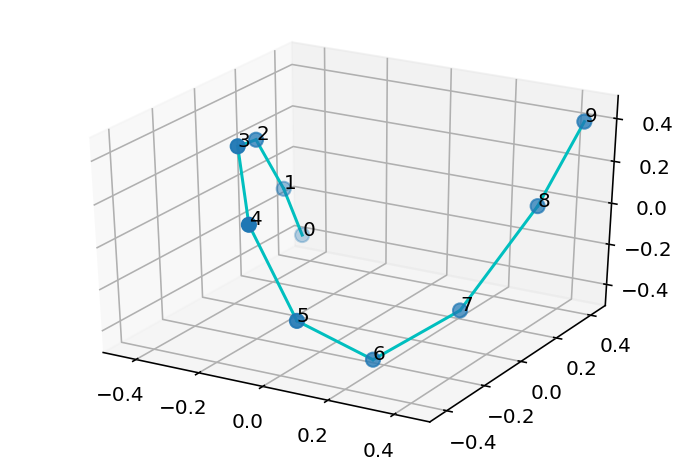

In [40]:
pos = Laplacian_3_embedding(g)
pos